---

## Requirement 2: Compute Linear Regression for Each Relationship

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [16]:
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

In [17]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,22.80,53,0,7.20,US,1730827157
1,bonthe,7.5264,-12.5050,29.72,65,5,4.05,SL,1730827179
2,west island,-12.1568,96.8225,26.99,83,100,7.20,CC,1730827201
3,kavaratti,10.5669,72.6420,27.81,77,5,2.31,IN,1730827223
4,tiksi,71.6872,128.8694,-13.47,76,100,6.56,RU,1730827246


In [18]:

def plot_linear_regression(x, y, x_label, y_label, title, save_path=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Create regression line values
    regression_line = slope * x + intercept

    # Plot scatter and regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, edgecolor="black", alpha=0.7)
    plt.plot(x, regression_line, color="red")

    # Display the R-squared value above the plot
    print(f"The r^2-value is: {r_value**2:.5f}")
    
    # Adjust annotation positions to the right side of the graph
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", 
                 (max(x) * 1, max(y) * 0.9), color="red")  # Equation
    plt.annotate(f"R² = {r_value**2:.2f}", 
                 (max(x) * 1, max(y) * 0.8), color="red")  # R-squared
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
  
    
    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path)
    
    # Show the plot
    plt.show()


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,22.80,53,0,7.20,US,1730827157
1,bonthe,7.5264,-12.5050,29.72,65,5,4.05,SL,1730827179
3,kavaratti,10.5669,72.6420,27.81,77,5,2.31,IN,1730827223
4,tiksi,71.6872,128.8694,-13.47,76,100,6.56,RU,1730827246
5,nehoiu,45.4167,26.3000,2.50,79,8,0.94,RO,1730827268


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,west island,-12.1568,96.8225,26.99,83,100,7.20,CC,1730827201
7,pastos bons,-6.6017,-44.0767,38.43,23,100,2.03,BR,1730827312
9,grytviken,-54.2811,-36.5092,1.22,99,100,2.52,GS,1730827357
10,ushuaia,-54.8000,-68.3000,4.81,65,75,2.06,AR,1730827379
11,atafu village,-8.5421,-172.5159,28.37,62,94,5.42,TK,1730827401


### Temperature vs. Latitude Linear Regression Plot 

The r^2-value is: 0.71534


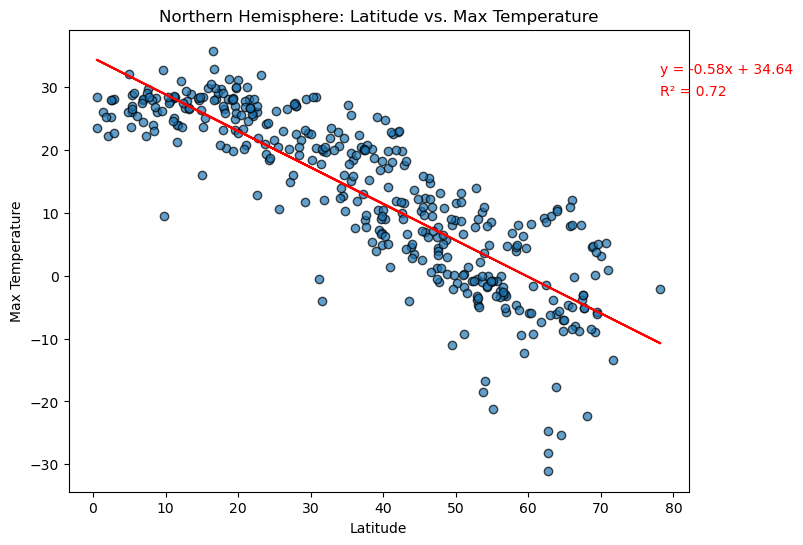

In [21]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
    x_label="Latitude", y_label="Max Temperature",
    title="Northern Hemisphere: Latitude vs. Max Temperature",
    save_path="output_data/NH_Lat_vs_MaxTemp_Regression.png"
)


The r^2-value is: 0.48677


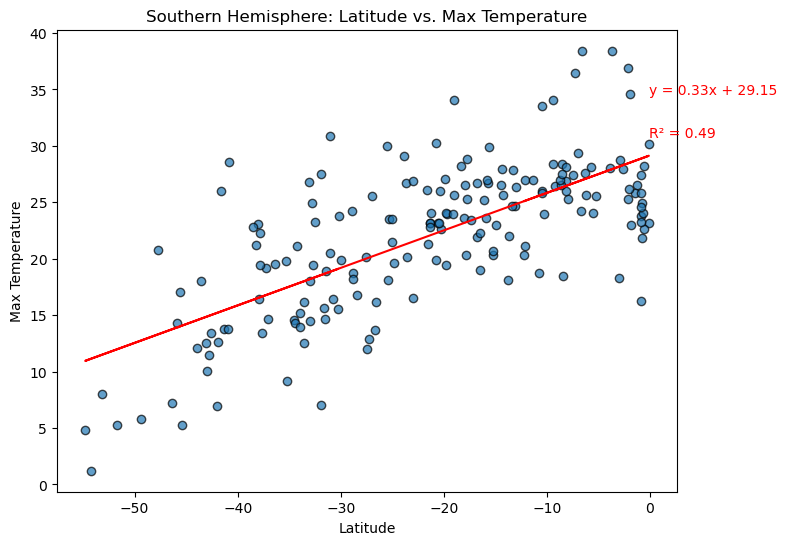

In [22]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
    x_label="Latitude", y_label="Max Temperature",
    title="Southern Hemisphere: Latitude vs. Max Temperature",
    save_path="output_data/SH_Lat_vs_MaxTemp_Regression.png"
)

### Discussion: 
- In both hemispheres, latitude has a clear effect on maximum temperature. The Northern Hemisphere shows a stronger relationship (higher \( R^2 \) value), likely due to more consistent temperature variations at higher northern latitudes.
- The Southern Hemisphere's relationship is weaker, possibly due to the larger oceanic influence in the southern latitudes, which can moderate temperature changes.


### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.07548


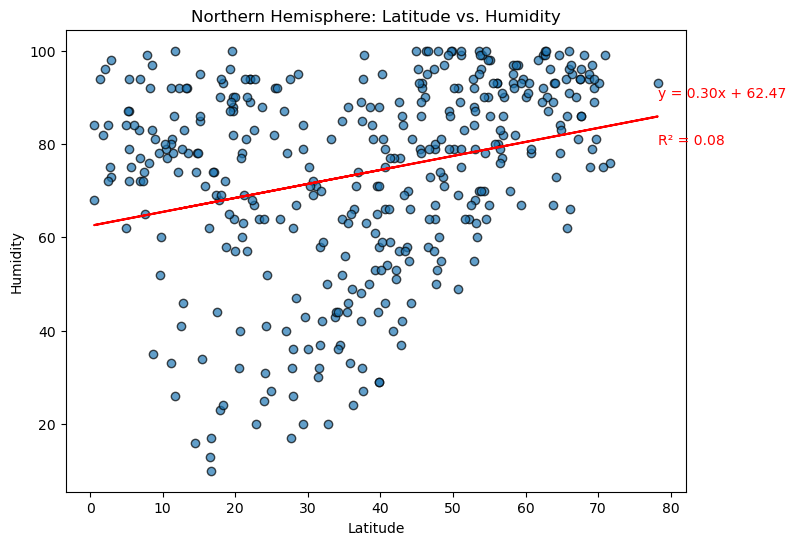

In [23]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
    x_label="Latitude", y_label="Humidity",
    title="Northern Hemisphere: Latitude vs. Humidity",
    save_path="output_data/NH_Lat_vs_Humidity_Regression.png"
)

The r^2-value is: 0.01311


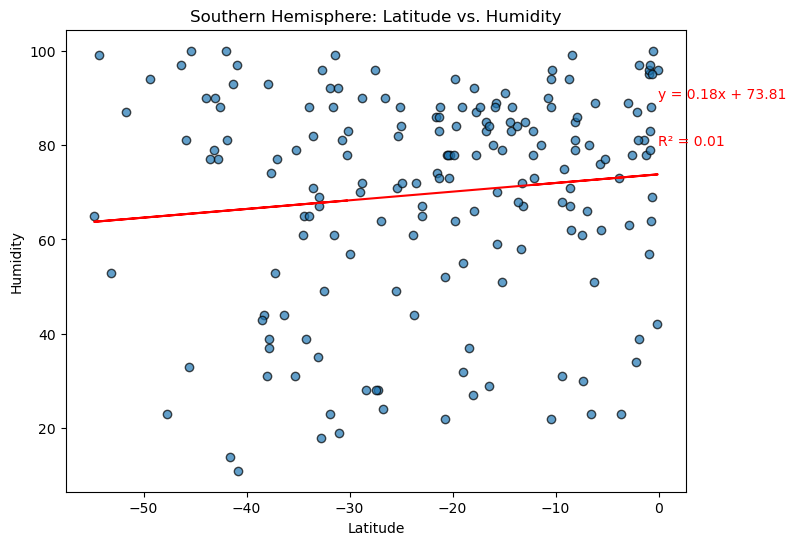

In [24]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
    x_label="Latitude", y_label="Humidity",
    title="Southern Hemisphere: Latitude vs. Humidity",
    save_path="output_data/SH_Lat_vs_Humidity_Regression.png"
)

### Discussion: 
- Both the low slope and the extremely low \( R^2 \) value for the Northern Hemisphere indicate that there is essentially no meaningful linear relationship between latitude and humidity.
- This result aligns with meteorological knowledge, as humidity is often more influenced by factors like proximity to water sources (oceans, seas), altitude, and prevailing weather patterns than by latitude alone.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.11901


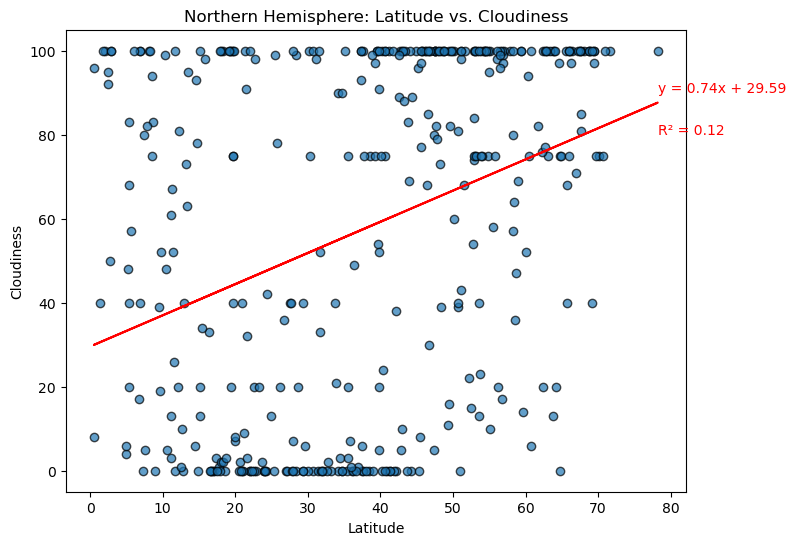

In [25]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
    x_label="Latitude", y_label="Cloudiness",
    title="Northern Hemisphere: Latitude vs. Cloudiness",
    save_path="output_data/NH_Lat_vs_Cloudiness_Regression.png"
)

The r^2-value is: 0.02426


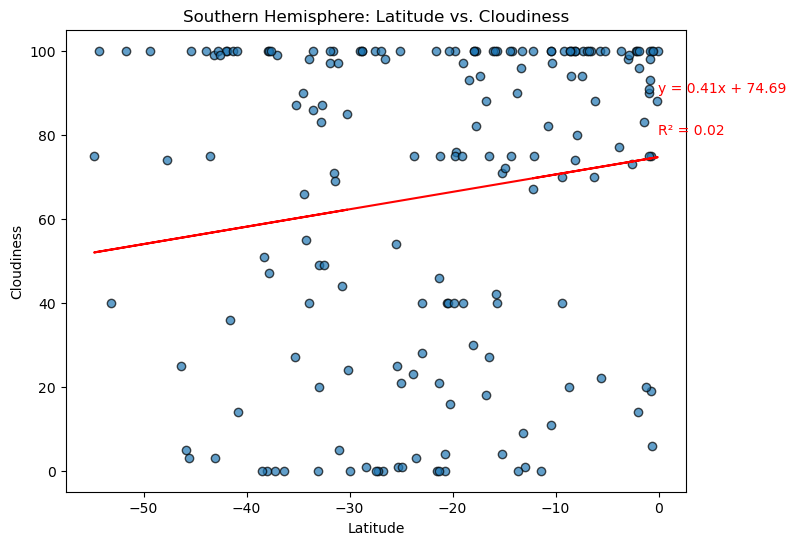

In [26]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
    x_label="Latitude", y_label="Cloudiness",
    title="Southern Hemisphere: Latitude vs. Cloudiness",
    save_path="output_data/SH_Lat_vs_Cloudiness_Regression.png"
)

### Discussion: 
- Both the Northern and Southern Hemisphere plots indicate a very weak relationship between latitude and cloudiness, as evidenced by the low \( R^2 \) values in both hemispheres.
- The data suggests that factors other than latitude, such as local weather patterns, geography, and proximity to oceans or large water bodies, likely have a more substantial influence on cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.02202


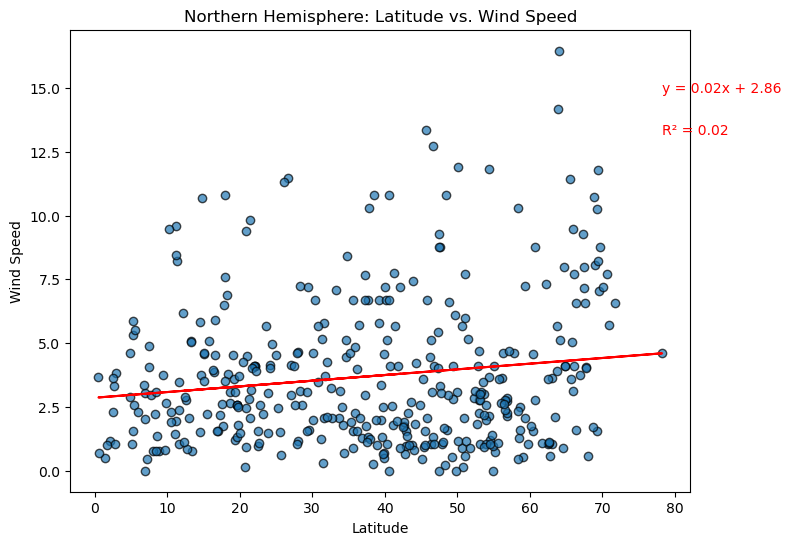

In [27]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
    x_label="Latitude", y_label="Wind Speed",
    title="Northern Hemisphere: Latitude vs. Wind Speed",
    save_path="output_data/NH_Lat_vs_WindSpeed_Regression.png"
)


The r^2-value is: 0.07925


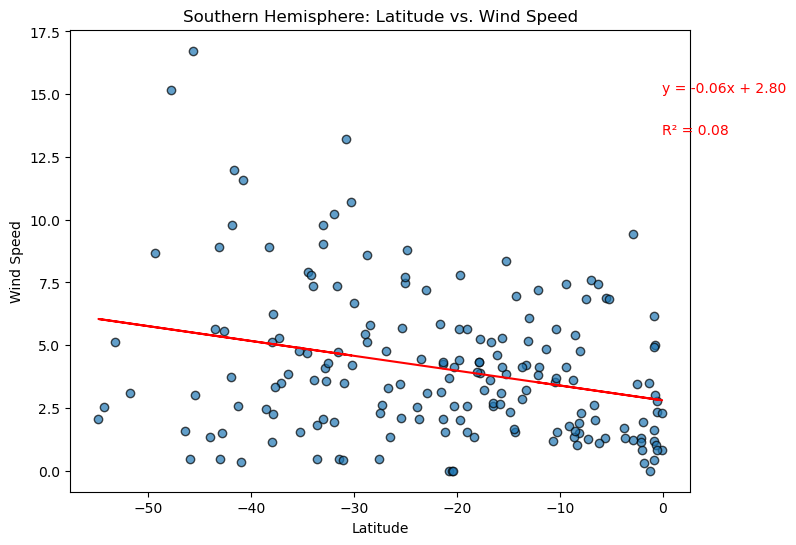

In [28]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
    x_label="Latitude", y_label="Wind Speed",
    title="Southern Hemisphere: Latitude vs. Wind Speed",
    save_path="output_data/SH_Lat_vs_WindSpeed_Regression.png"
)


### Discussion:
- Both the Northern and Southern Hemisphere plots indicate very weak linear relationships between latitude and wind speed, as evidenced by the low \( R^2 \) values.
- These results imply that latitude alone is not a good predictor of wind speed. Wind speed is more likely influenced by other factors, including topography, ocean currents, and localized weather patterns.